In [3]:
# import glob
# import os
import pandas as pd
import altair as alt
import calendar
import datetime
from altair import pipe, limit_rows, to_values
#import utm
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
# Include an image for each plot since Gradescope only supports displaying plots as images
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
# Read in the data
url = 'https://raw.githubusercontent.com/sgskung/crime320/main/combined.csv'
df = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/sgskung/crime320/main/incomes_ab.csv'
df2 = pd.read_csv(url2)

In [5]:
# Creating necessary variables
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [4]:
url_geojson = "https://raw.githubusercontent.com/blackmad/neighborhoods/master/vancouver.geojson"
data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))

In [7]:
def rule(row):
    lat, lon = utm.to_latlon(row["X"], row["Y"], 45, 'K')
    return pd.Series({"lat": X, "long": Y})

df.merge(df.apply(rule(df), axis=1), left_index= True, right_index= True)

NameError: name 'utm' is not defined

In [8]:
crimes = alt.topo_feature(url_geojson, feature = 'Neighborhoods')

bg = alt.Chart(crimes).mark_geoshape(fill='lightgray', stroke='white').encode(
    longitude='X:Q',
    latitude='Y:Q',
    size=alt.value(10)
).project(
).properties(
    width=500,
    height=400
)

points = alt.Chart(df).mark_circle().encode(
    longitude='X:Q',
    latitude='Y:Q',
    size=alt.value(15)
)

bg

/Users/justin/miniforge3/lib/python3.10/site-packages/altair/utils/core.py:283: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


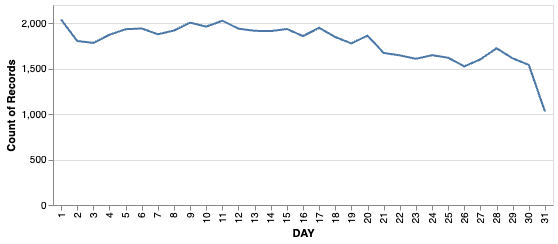

In [9]:
variable = 'DAY'

alt.Chart(df).mark_line(
).encode(
    alt.X(variable, type = 'ordinal'),
    alt.Y('count():Q')
).properties(
    width = 500,
    height = 200
)

In [10]:
times = ['MONTH', 'DAY', 'HOUR']
timespan = ['Timespan']
select_box = alt.binding_select(options=times, name='column')
sel = alt.selection_single(fields=['column'], bind=select_box, init={'column': 'MONTH'})

alt.Chart(df).mark_line().transform_fold(
    times,
    as_=['column', 'value']
).transform_filter(
    sel
).encode(
    alt.X('MONTH:O', type = 'ordinal'),
    alt.Y('count():Q')
).add_selection(
    sel
)

sel

Selection('selector001', SelectionDef({
  bind: BindRadioSelect({
    input: 'select',
    name: 'column',
    options: ['MONTH', 'DAY', 'HOUR']
  }),
  fields: ['column'],
  init: {'column': 'MONTH'},
  type: 'single'
}))

In [11]:
xcol_param = alt.param(value = 'MONTH', bind = select_box)

alt.Chart(df).mark_line(
).encode(
    alt.X('MONTH:O', type = 'ordinal'),
    alt.Y('count():Q')
).transform_calculate(
    x=f'datum[{xcol_param.name}]'
).add_params(
    xcol_param
)

AttributeError: module 'altair' has no attribute 'param'

In [12]:
neighbours = df['NEIGHBOURHOOD'].unique() # get unique field values
neighbours = list(filter(lambda d: d is not None, neighbours)) # filter out None values
neighbours.sort() # sort alphabetically

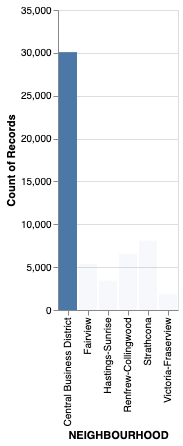

In [13]:
# selectNeighbour = alt.selection_single(
#     name='Select', # name the selection 'Select'
#     fields=['NEIGHBOURHOOD'], # limit selection to the Major_Genre field
#     init={'NEIGHBOURHOOD': neighbours[0]}, # use first genre entry as initial value
#     bind=alt.binding_select(options=neighbours) # bind to a menu of unique genre values
# )

# alt.Chart(df).mark_bar().add_selection(
#     selectNeighbour
# ).encode(
#     x='NEIGHBOURHOOD:N',
#     y='count():Q',
#     opacity=alt.condition(selectNeighbour, alt.value(1), alt.value(0.05))
# )

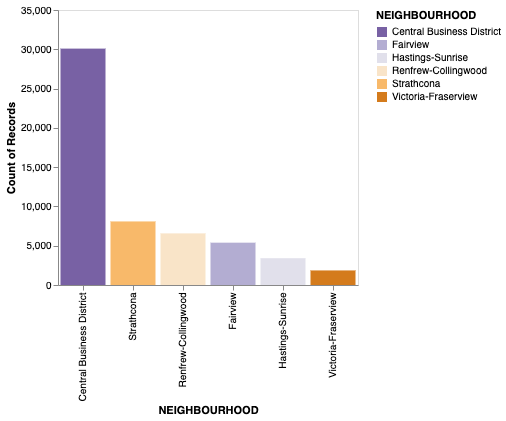

In [14]:
crime_type_count_bar = alt.Chart(df).mark_bar().encode(    
    alt.X("NEIGHBOURHOOD", sort = '-y'),
    alt.Y("count()"),
    alt.Color('NEIGHBOURHOOD', scale=alt.Scale(scheme='purpleorange')),
    #alt.Tooltip('TYPE')
).properties(
    height = 275,
    width = 300
).configure_axis(
    grid = False
)
crime_type_count_bar

In [15]:
#join median income column to df

# extracted_income = df2['Median Household Income After Taxes']
# df_w_income = df.join(extracted_income)
d = {}
for index, row in df2.iterrows():
    d[row['Neighborhood']] = row['Median Household Income After Taxes']
    # print(row['Neighborhood'])

df['Income'] = df.apply(lambda x: d[x['NEIGHBOURHOOD']], axis = 1)
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,DATE,Income
0,Theft from Vehicle,2022,1,29,9,30,19XX W GEORGIA ST,Central Business District,490079.3981,5.460210e+06,2022-01-29,53574.0
1,Theft from Vehicle,2022,1,29,13,30,19XX W GEORGIA ST,Central Business District,490079.3981,5.460210e+06,2022-01-29,53574.0
2,Theft from Vehicle,2022,2,4,13,0,19XX W GEORGIA ST,Central Business District,490079.3981,5.460210e+06,2022-02-04,53574.0
3,Theft from Vehicle,2022,2,20,14,0,19XX W GEORGIA ST,Central Business District,490079.3981,5.460210e+06,2022-02-20,53574.0
4,Theft from Vehicle,2022,4,5,13,0,19XX W GEORGIA ST,Central Business District,490079.3981,5.460210e+06,2022-04-05,53574.0
...,...,...,...,...,...,...,...,...,...,...,...,...
55393,Theft from Vehicle,2022,2,8,16,45,17XX GLEN DR,Strathcona,494082.1971,5.457439e+06,2022-02-08,22542.0
55394,Theft from Vehicle,2022,3,8,22,40,17XX GLEN DR,Strathcona,494082.1971,5.457439e+06,2022-03-08,22542.0
55395,Theft from Vehicle,2022,5,1,0,0,17XX GLEN DR,Strathcona,494082.6659,5.457406e+06,2022-05-01,22542.0
55396,Theft from Vehicle,2022,5,17,0,18,18XX CLARK DR,Strathcona,494366.0040,5.457253e+06,2022-05-17,22542.0


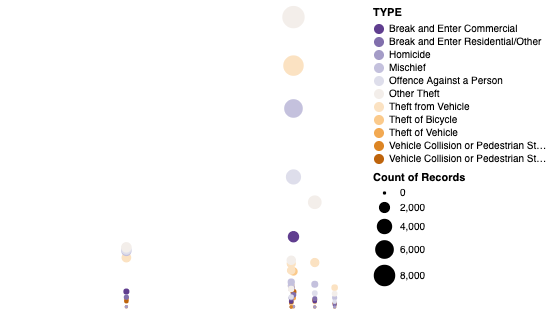

In [16]:
crime_bubble = alt.Chart(df).mark_circle().encode(    
    alt.X("Income", axis = None),
    alt.Y("count()", axis = None),
    alt.Color('TYPE', scale=alt.Scale(scheme='purpleorange')),
    alt.Tooltip('Income'),
    alt.Size("count()", scale=alt.Scale(range=[10, 500]))
).configure_axis(
    grid = False
).configure_view(
    strokeWidth = 0
).properties(
    height = 300,
    width = 350
)
crime_bubble